In [0]:
#!wget https://www.dropbox.com/s/cweqc99ew6wsftv/cig_butts_short.tar?dl=0
#!mv cig_butts_short.tar?dl=0 cig_butts.tar
#!tar -xvf cig_butts.tar

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import time
import torch
import os

from datasets import CigButtDataset
from augmentations import *

DATA_PATH  = 'cig_butts'

transforms = [
    RandomCrop(p=0.25),
    RandomHorizontalFlip(p=0.25),
    RandomVerticalFlip(p=0.25),
    RandomRotation(15., p=0.25)
]

train_dataset = CigButtDataset(
    os.path.join(DATA_PATH, 'train'), 
    transforms=transforms
)
val_dataset   = CigButtDataset(
    os.path.join(DATA_PATH, 'val'  ),
    transforms=None
)

train_batch_gen = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_batch_gen   = torch.utils.data.DataLoader(val_dataset, batch_size = 16, shuffle=True)

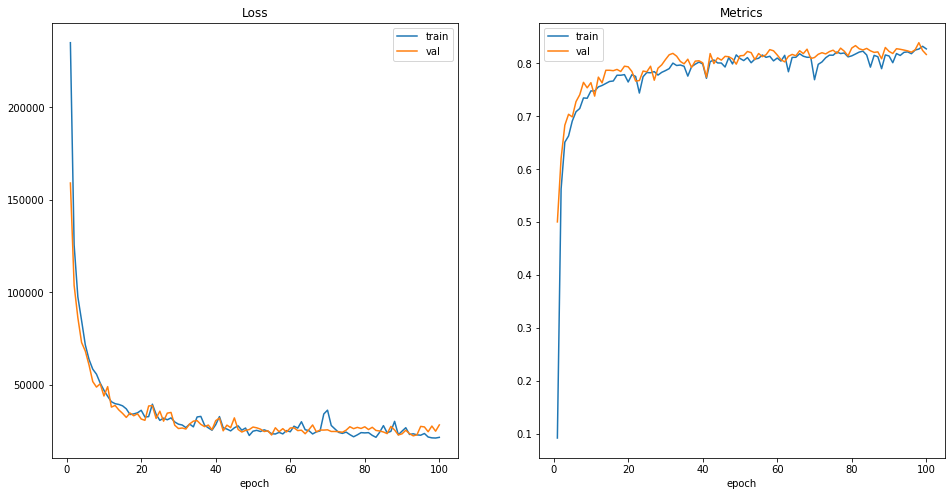

Epoch 100 of 100 took 112.188s
  Training metrics: 	0.827374
  Validation metrics: 			0.816842 
Trainig took 11405.976672172546s in total


In [11]:
from training import train_model
from models import UNet3
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from utils import evaluate_dice
from torch.optim.lr_scheduler import ReduceLROnPlateau

unet = UNet3(activation='LeakyReLU').float()
optimizer = torch.optim.Adam(unet.parameters(), lr=1e-4)

checkpoint_name = '/content/drive/My Drive/unet_extended_dataset.pth'
image_dir       = '/content/drive/My Drive/images/unet_extended_dataset'


unet, optimizer, _, _ = train_model(
    unet, evaluate_dice, train_batch_gen, val_batch_gen,
    optimizer, ckpt_name=checkpoint_name, n_epochs=100, plot_path=image_dir)